# TensorBoard 실행하기
- CIFAR10 데이터셋 이용해서 TensorBoard 활용해보기

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainsets = torchvision.datasets.CIFAR10(root = './data', train = True,
                                           download = False, transform = transform)

trainloader = torch.utils.data.DataLoader(trainsets, batch_size = 128,
                                          shuffle=True, num_workers = 1)

classes = trainsets.classes
print(trainsets)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


bird airplane dog bird


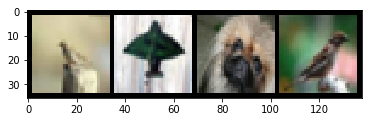

In [3]:
def imshow(img):
    img = img / 2 + 0.5
    img_grid = torchvision.utils.make_grid(img)
    plt.imshow(img_grid.permute((1,2,0)))
    
example_data = iter(trainloader).next()
example_images, example_labels = example_data

imshow(example_images[:4])
print(' '.join(classes[i] for i in example_labels[:4]))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(20 * 5 * 5, 100)
        self.fc2 = nn.Linear(100, 60)
        self.fc3 = nn.Linear(60, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 20 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [5]:
optimizer = optim.SGD(net.parameters(), lr = 0.001)
loss_func = nn.CrossEntropyLoss()

In [6]:
# Tensorboard

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs')

c:\programdata\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:522: FutureWarning: Passi

AttributeError: module 'tensorflow' has no attribute 'io'